In [2]:


# *******************************  IMPORTING LIBRARIES  ***********************************


import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.ensemble import IsolationForest
from mpl_toolkits.mplot3d import Axes3D
import warnings
import seaborn as sns
from matplotlib.patches import Patch

# Importing notebook makes rotating plots possible
%matplotlib notebook

In [3]:


# *******************************  LOADING DATA  ***********************************


columnNames = ['seq_name','tag_id', 'timestamp', 'time', 'x_pos', 'y_pos', 'z_pos', 'activity']
df = pd.read_csv('/Users/viraoetterli/Downloads/ConfLongDemo_JSI.txt', sep=',', header=None, names=columnNames)

In [4]:


# *******************************  PREPROCESSING  ***********************************

# Replacing values for clarity
df['tag_id'].replace({'010-000-024-033':'Ankle_left', '010-000-030-096':'Ankle_right',
                     '020-000-032-221':'Belt', '020-000-033-111':'Chest'}, inplace=True)

# Creating list of each unique activity (target classes)
activities = df['activity'].unique()

# Displaying the data
display(df)

# Looking at the range of the coordinates and the square meter result of the room
print("The x-coordinates ranges from:",round(df['x_pos'].min(),2),"to:", round(df['x_pos'].max(),2))
print("The y-coordinates ranges from:",round(df['y_pos'].min(),2),"to:", round(df['y_pos'].max(),2))
print("The z-coordinates ranges from:",round(df['z_pos'].min(),2),"to:", round(df['z_pos'].max(),2))

square_meters = round((df['x_pos'].max() - df['x_pos'].min()) * (df['y_pos'].max() - df['y_pos'].min()),2)
print("This would result in a room of", square_meters, "square meters")

# Dict for separated sensor dataframes
sensor_dfs = {}

# Dict for separated sensor-sequence dataframes
sensor_seq_dfs = {}

# Group the data by sensor
grouped_sensors = df.groupby('tag_id')

# Loop through each sensor group and create a new dataframe for each sensor
for sensor, group in grouped_sensors:
    sensor_df = pd.DataFrame(group)
    sensor_dfs[sensor] = sensor_df
    
    # Group the sensors by sequence name
    grouped_sequences = sensor_df.groupby('seq_name')
    
    # Loop through each sensor-sequence group and create a new dataframe for each sensor and sequence
    for sequence, group in grouped_sequences:
        sequence_df = pd.DataFrame(group)
        name = sequence + " " + sensor
        sensor_seq_dfs[name] = sequence_df

seq_name       tag_id           timestamp                     time  \
0           A01   Ankle_left  633790226051280329  27.05.2009 14:03:25:127   
1           A01        Chest  633790226051820913  27.05.2009 14:03:25:183   
2           A01         Belt  633790226052091205  27.05.2009 14:03:25:210   
3           A01   Ankle_left  633790226052361498  27.05.2009 14:03:25:237   
4           A01  Ankle_right  633790226052631792  27.05.2009 14:03:25:263   
...         ...          ...                 ...                      ...   
164855      E05  Ankle_right  633790146419554374  27.05.2009 11:50:41:957   
164856      E05   Ankle_left  633790146419824669  27.05.2009 11:50:41:983   
164857      E05        Chest  633790146420094965  27.05.2009 11:50:42:010   
164858      E05  Ankle_right  633790146420635550  27.05.2009 11:50:42:063   
164859      E05   Ankle_left  633790146420905847  27.05.2009 11:50:42:090   

           x_pos     y_pos     z_pos activity  
0       4.062931  1.892434  0.507425  walking  
1       4.291954  1.781140  1.344495  walking  
2       4.359101  1.826456  0.968821  walking  
3       4.087835  1.879999  0.466983  walking  
4       4.324462  2.072460  0.488065  walking  
...          ...       ...       ...      ...  
164855  3.209474  2.044571  0.062902  walking  
164856  3.386878  2.004729  0.395161  walking  
164857  3.188895  1.915717  1.353087  walking  
164858  3.150169  1.931164  0.055037  walking  
164859  3.209994  1.939577  0.364777  walking  

[164860 rows x 8 columns]

The x-coordinates ranges from: -0.28 to: 5.76
The y-coordinates ranges from: -0.49 to: 3.98
The z-coordinates ranges from: -2.54 to: 2.61
This would result in a room of 27.0 square meters


<IPython.core.display.Javascript object>


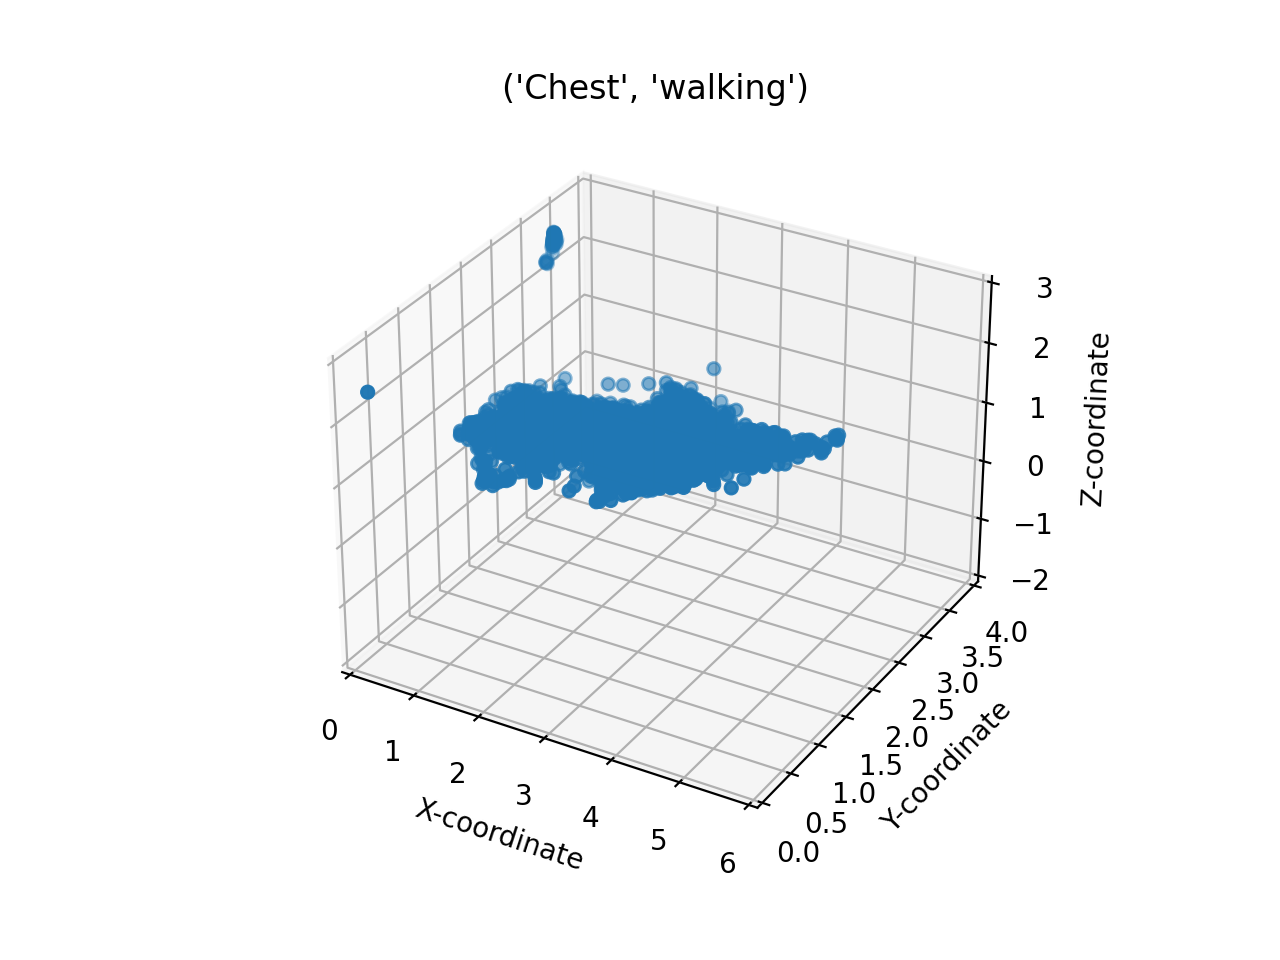

Mean value of z-coordinate: 1.268248709237546


<IPython.core.display.Javascript object>


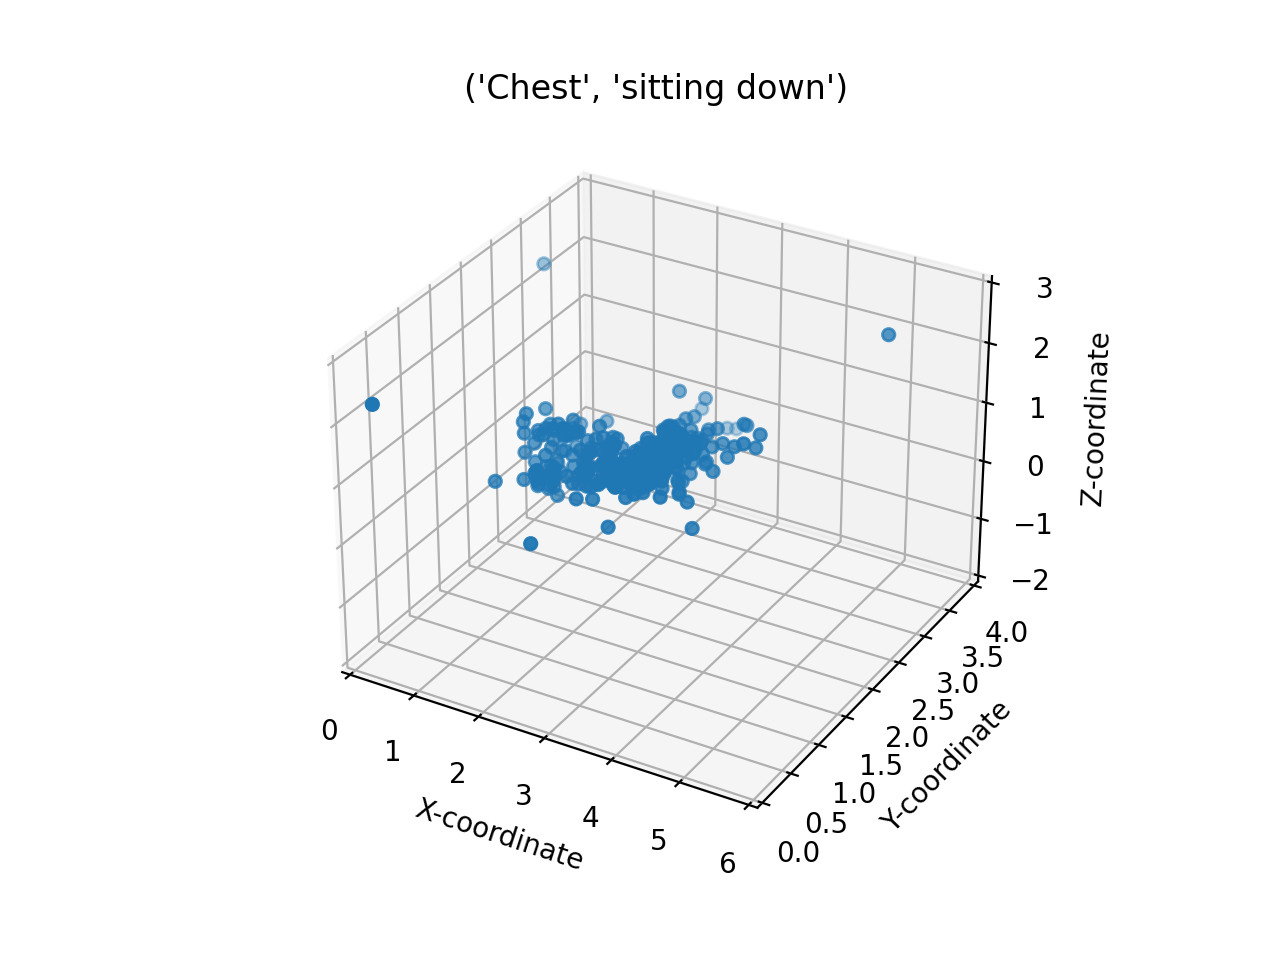

Mean value of z-coordinate: 0.9316631333017464


<IPython.core.display.Javascript object>


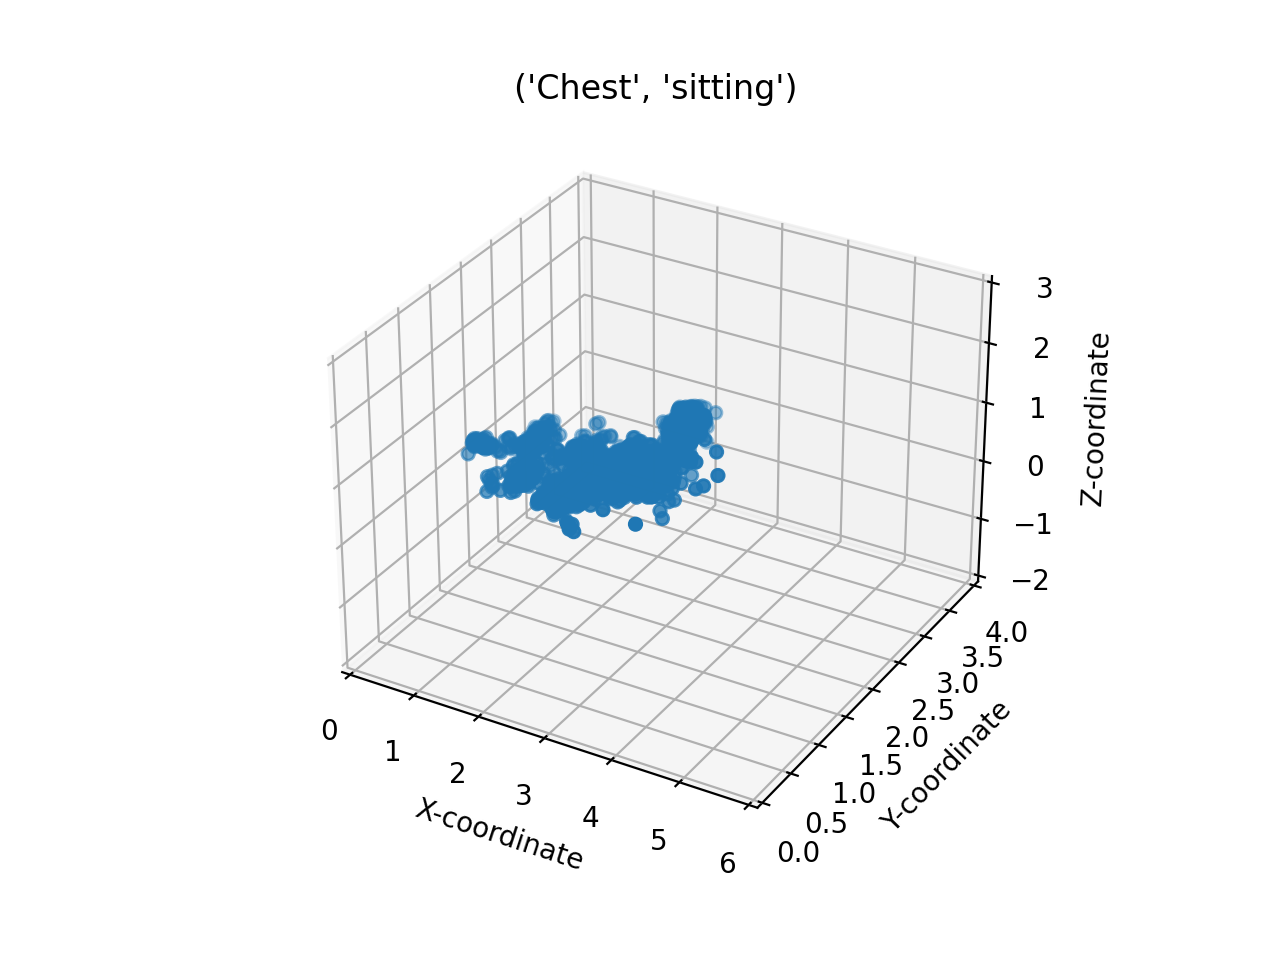

Mean value of z-coordinate: 0.9313078090278822


<IPython.core.display.Javascript object>


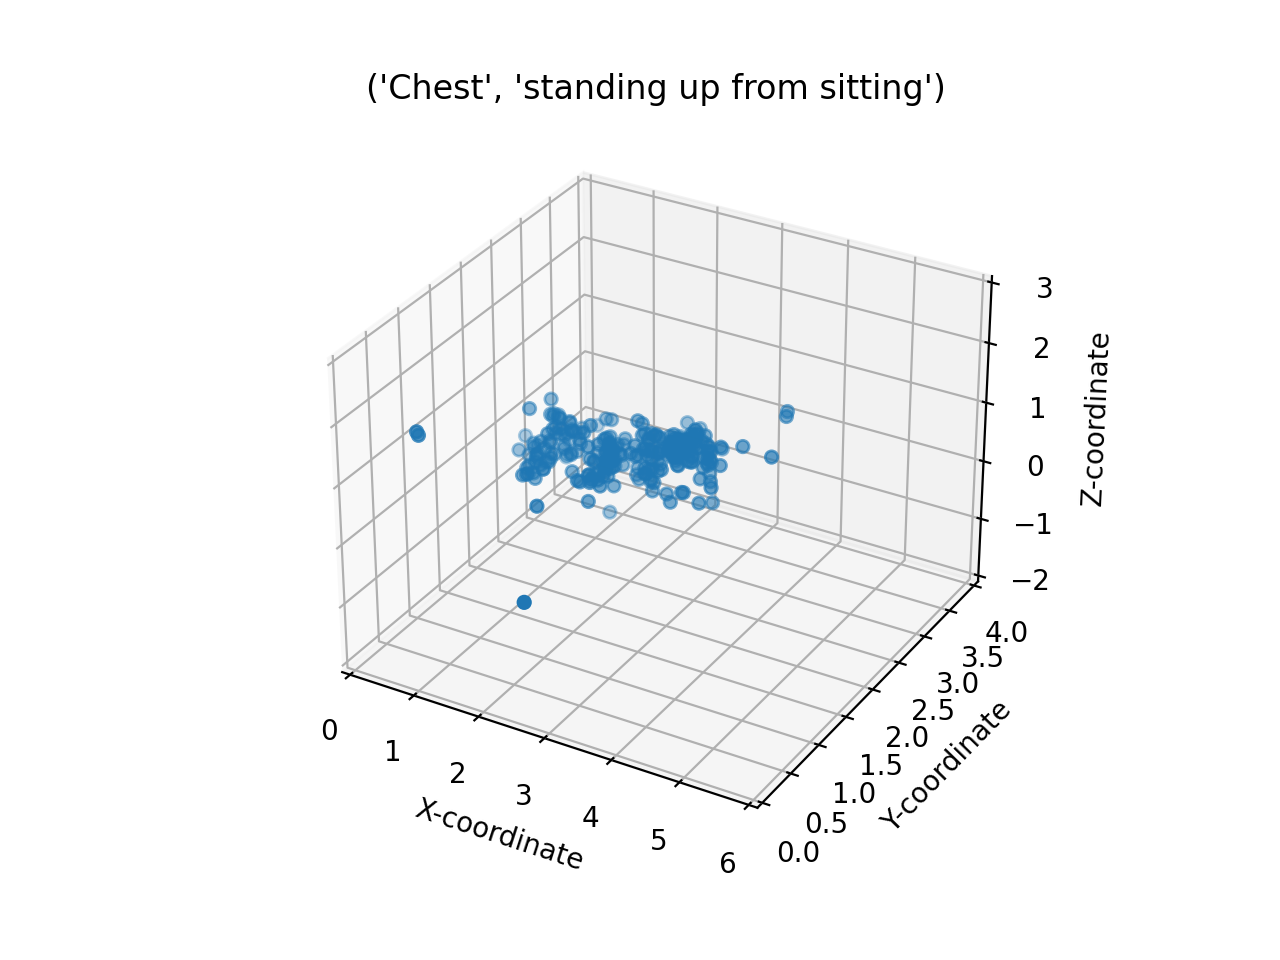

Mean value of z-coordinate: 0.9292102440809592


<IPython.core.display.Javascript object>


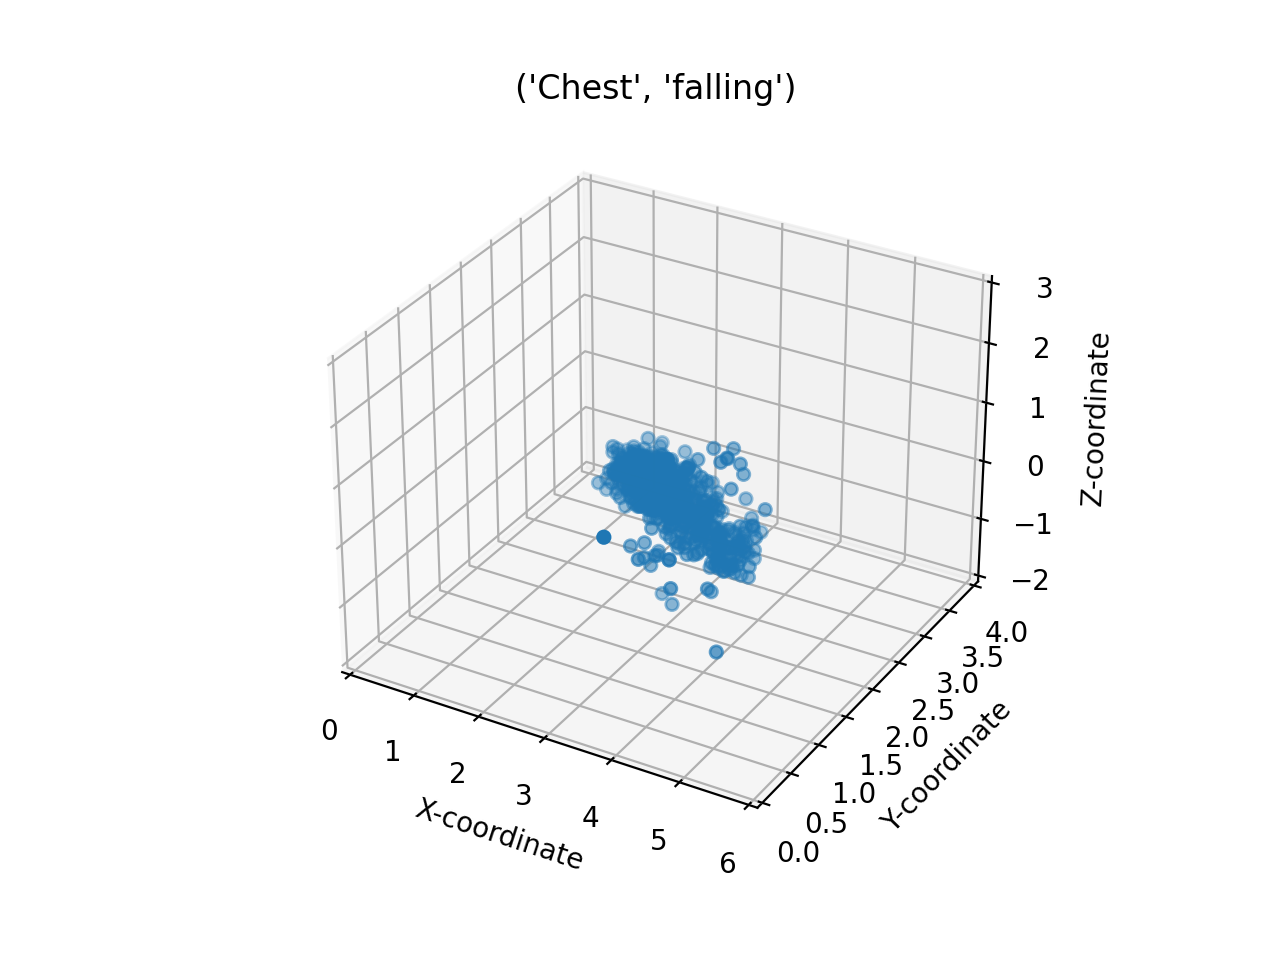

Mean value of z-coordinate: 0.8692310883099341


<IPython.core.display.Javascript object>


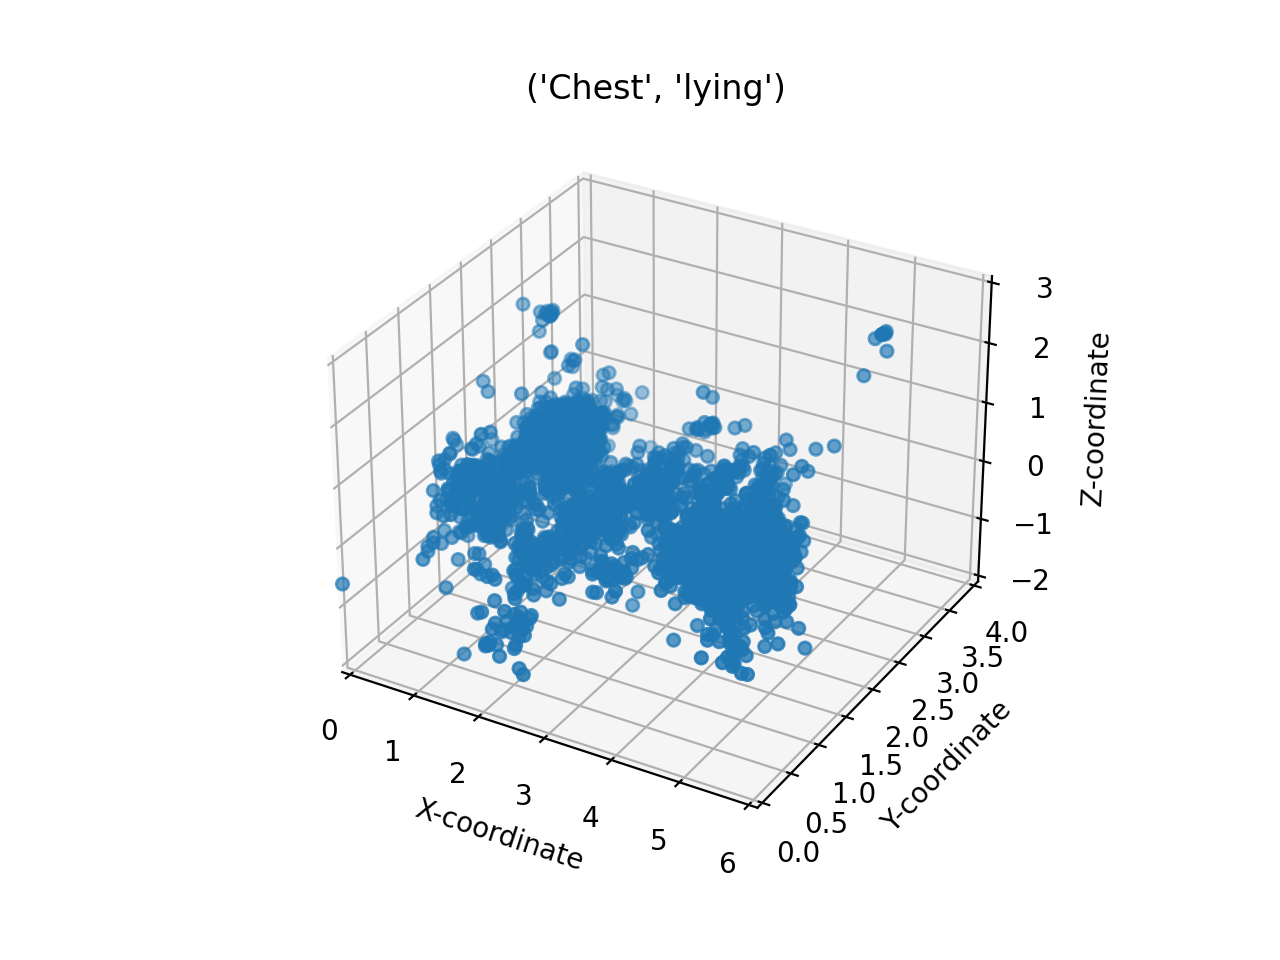

Mean value of z-coordinate: 0.29899572878402203


<IPython.core.display.Javascript object>


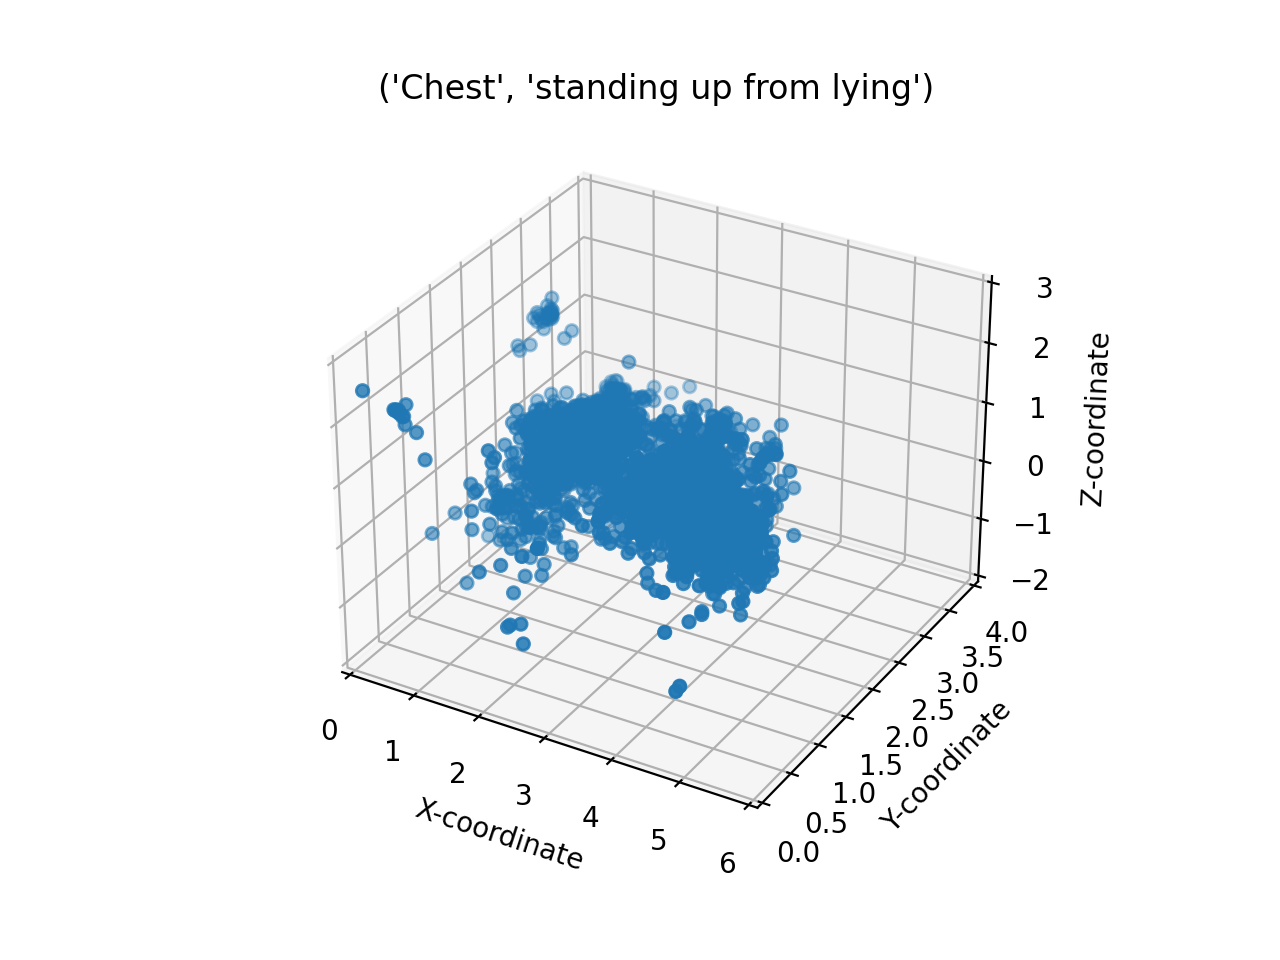

Mean value of z-coordinate: 0.6375203899179988


<IPython.core.display.Javascript object>


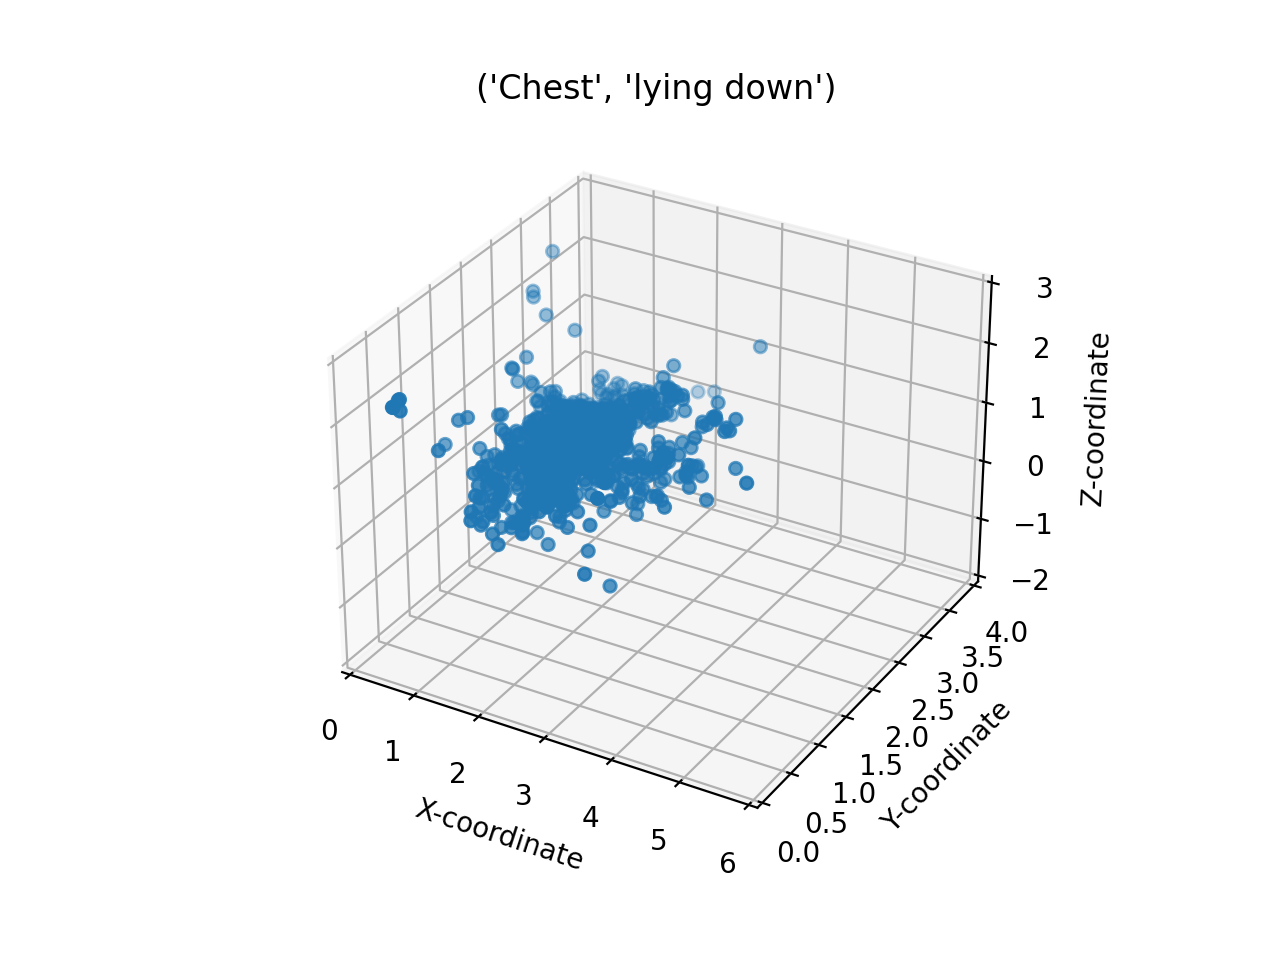

Mean value of z-coordinate: 0.642784453114006


<IPython.core.display.Javascript object>


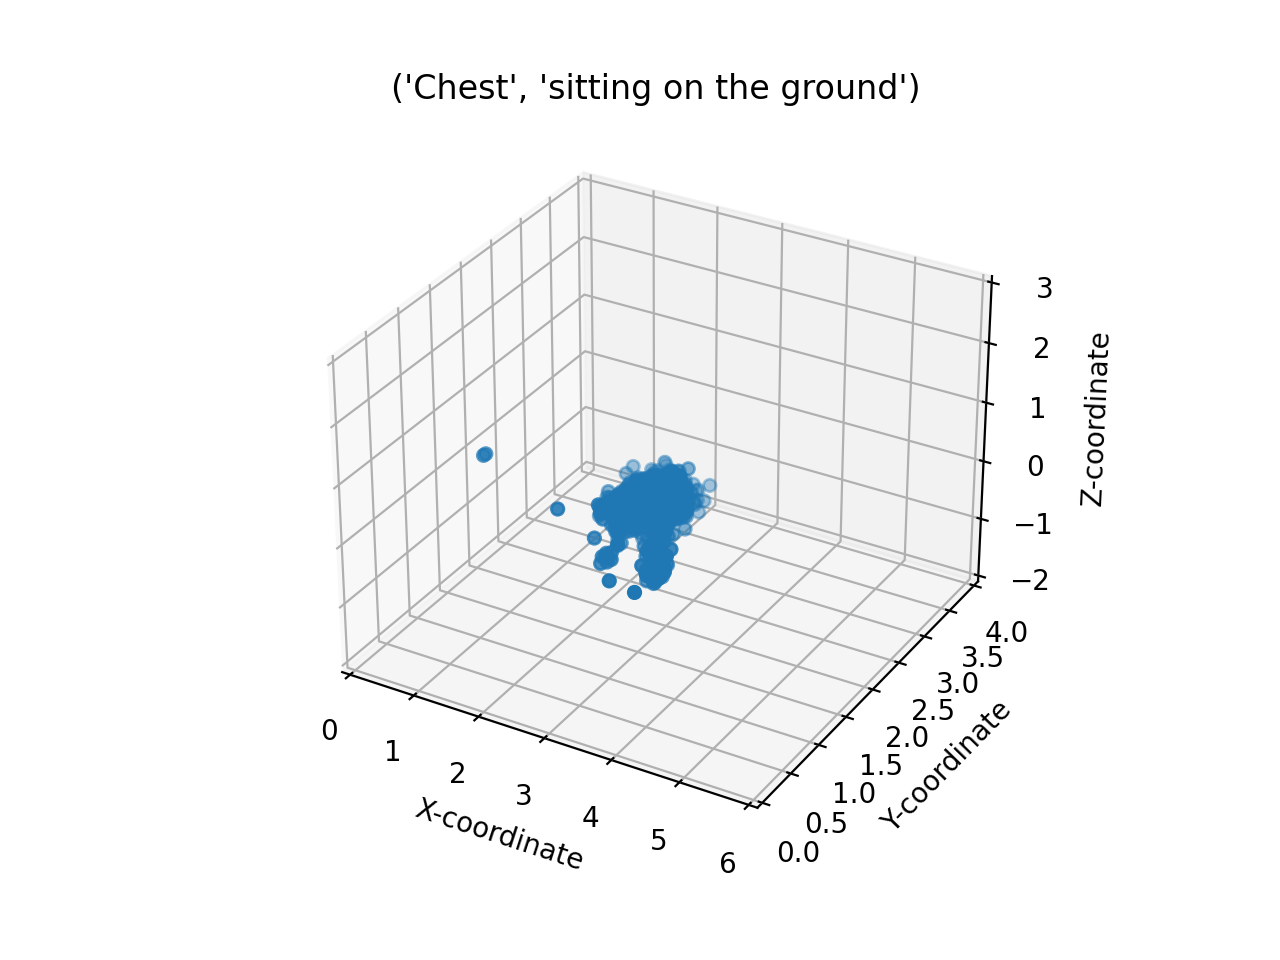

Mean value of z-coordinate: 0.6378195363501786


<IPython.core.display.Javascript object>


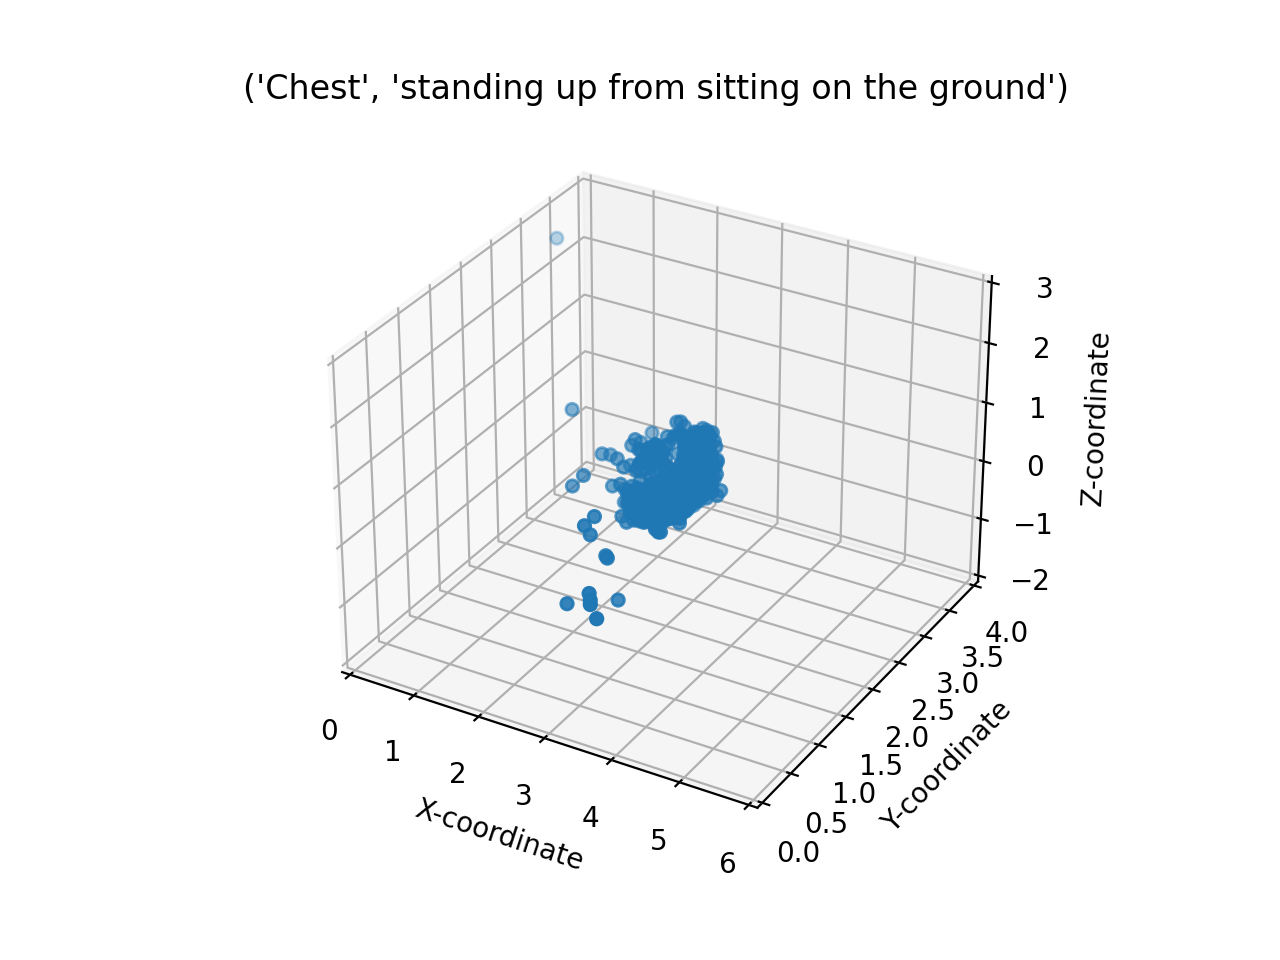

Mean value of z-coordinate: 0.6533366267286665


<IPython.core.display.Javascript object>


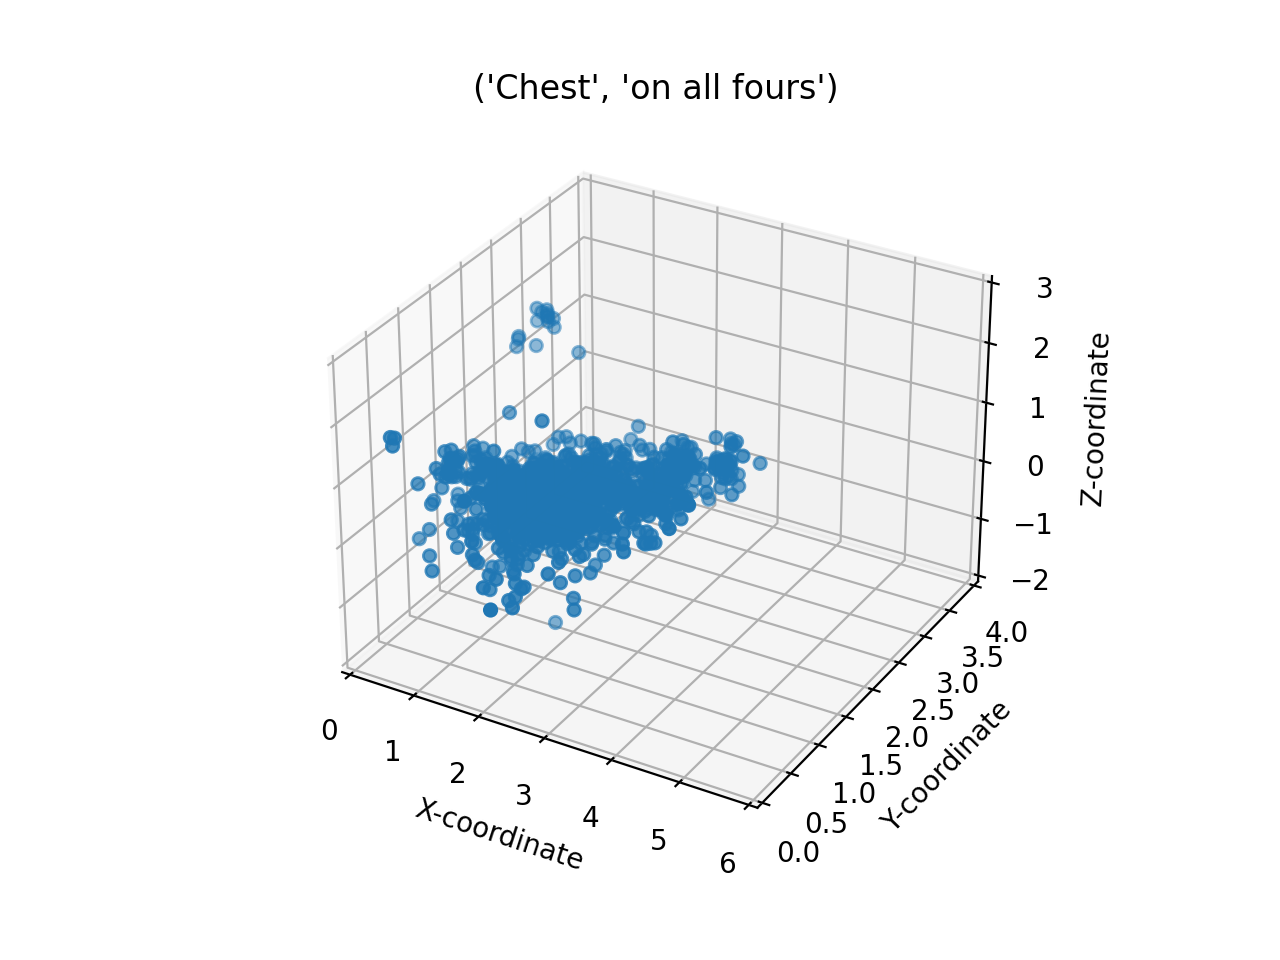

Mean value of z-coordinate: 0.28699726101650413


In [5]:

# *******************************  PLOTTING THE ACTIVITIES ***********************************

def plot_per_class_3D(df, key):
    # Plot coordinates per activity and sensor to see patterns in data
    
    for activity in activities:
        ax = plt.figure().add_subplot(111, projection='3d')
        
        # Dataframe for each activity
        act_df = df[df['activity'] == activity]
        print('Mean value of z-coordinate:', act_df['z_pos'].mean())
        
        ax.scatter(act_df['x_pos'], act_df['y_pos'], act_df['z_pos'])
        ax.set_xlabel('X-coordinate') ; ax.set_ylabel('Y-coordinate') ; ax.set_zlabel('Z-coordinate')
        ax.set_xlim(0,6) ; ax.set_ylim(0,4) ; ax.set_zlim(-2,3)
        title = key, activity
        ax.set_title(title)
        plt.show()
        
plot_per_class_3D(sensor_dfs["Chest"], "Chest")
#plot_per_class_3D(sensor_dfs["Ankle_left"], "Ankle_left")
#plot_per_class_3D(sensor_dfs["Ankle_right"], "Ankle_right")

<IPython.core.display.Javascript object>


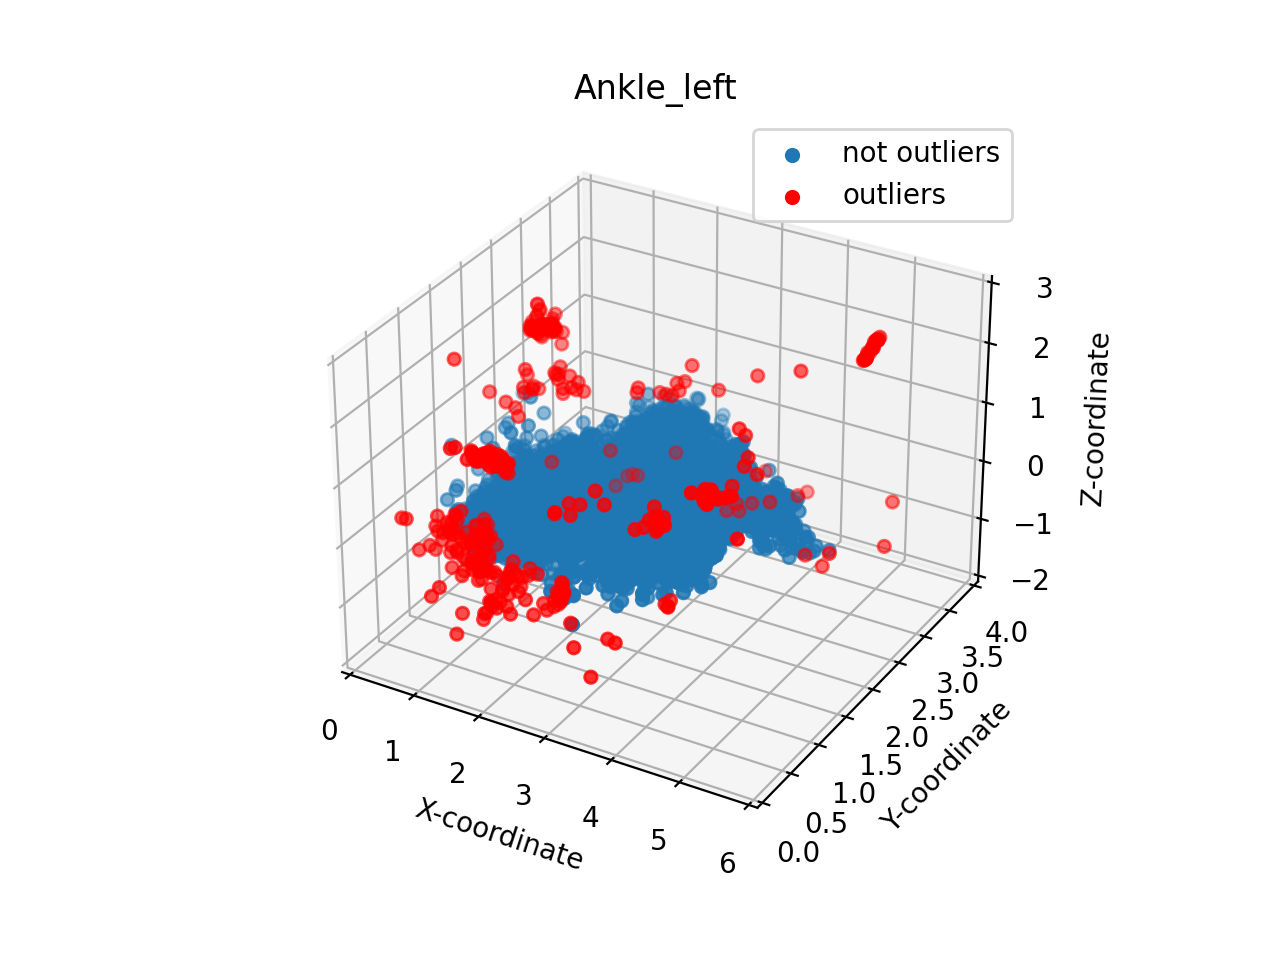

<IPython.core.display.Javascript object>


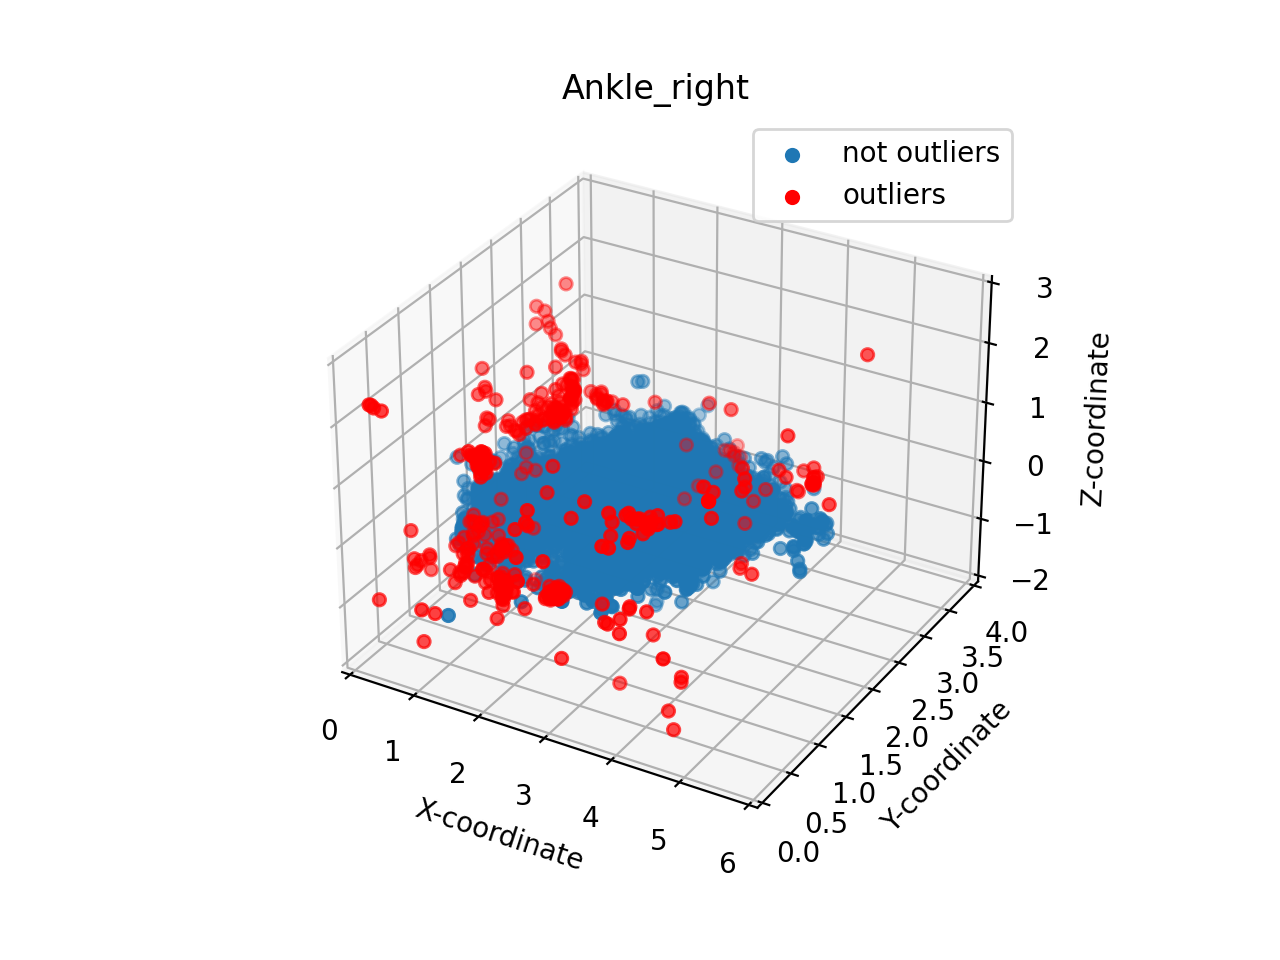

<IPython.core.display.Javascript object>


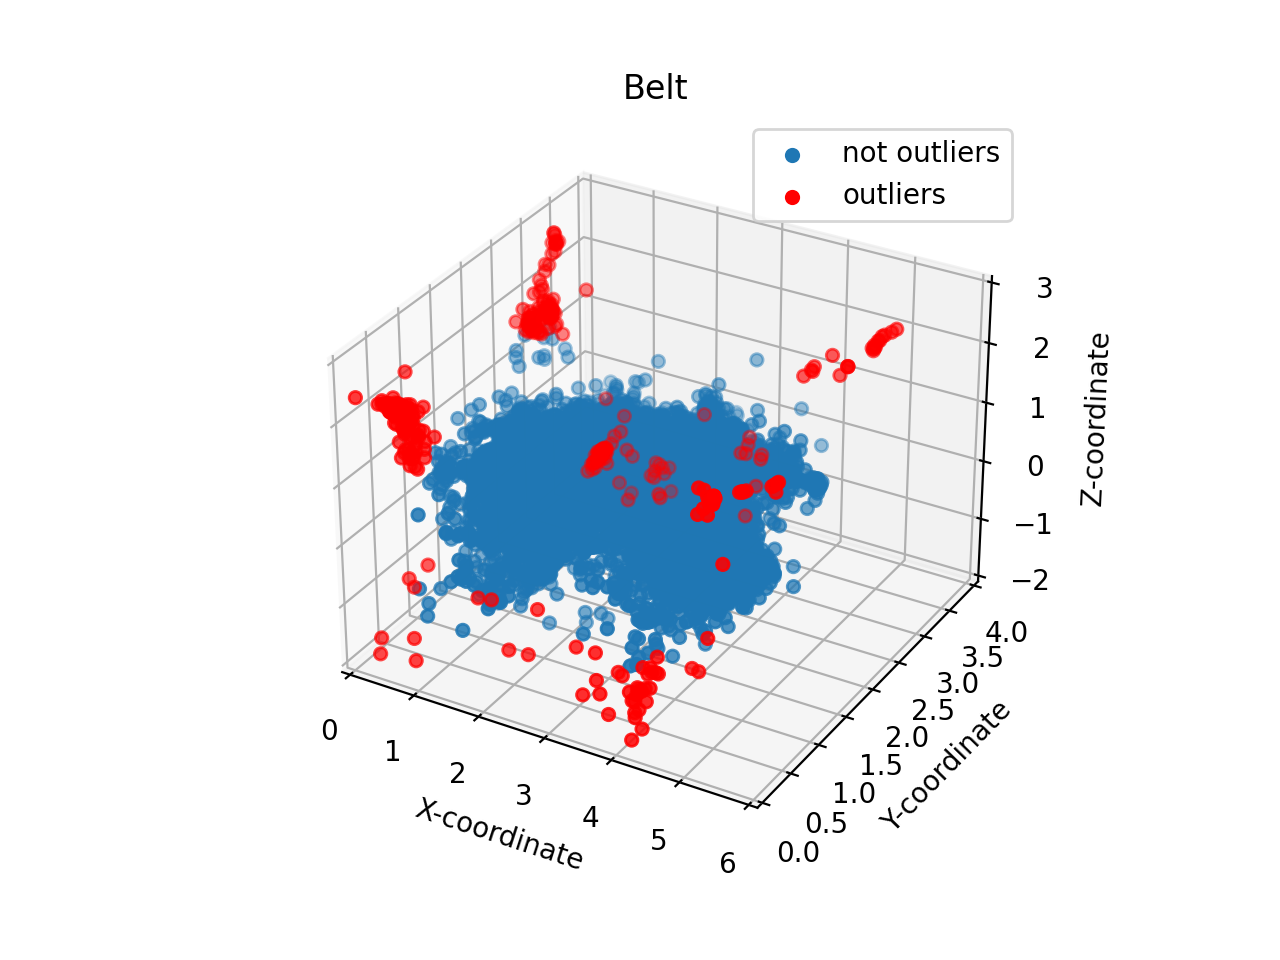

<IPython.core.display.Javascript object>


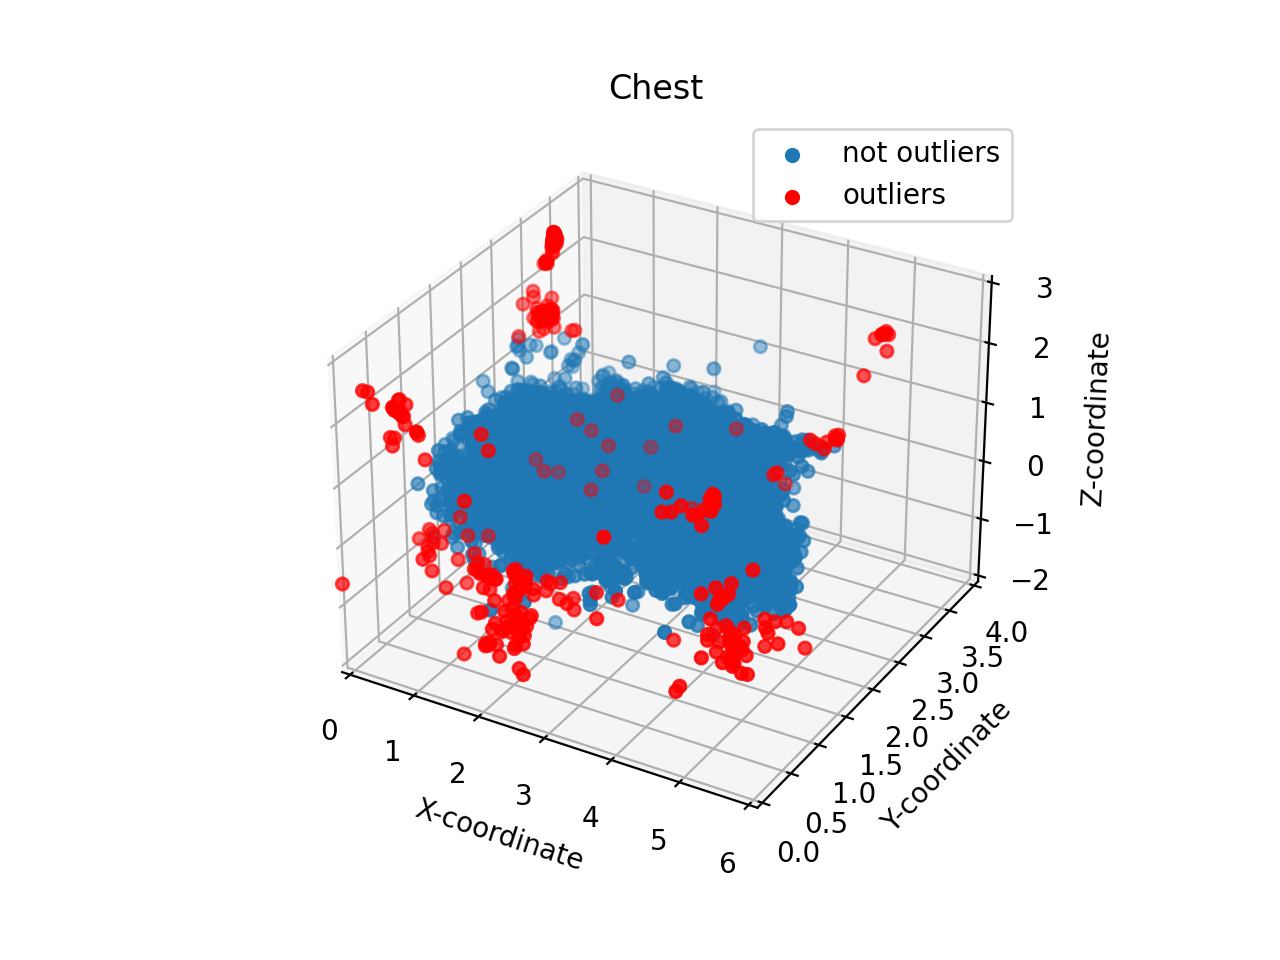

In [6]:
# Ignoring warnings
warnings.simplefilter(action='ignore', category=UserWarning)

# *******************************  OUTLIER DETECTION ***********************************


# Dictionary with each sensor dataframe without the outliers 
smooth_dfs = {}



def plot_outliers_3D(outlier_df, smooth_df, key):
    # Plot outliers per sensor
    
    ax = plt.figure().add_subplot(111, projection='3d')
    ax.scatter(smooth_df['x_pos'], smooth_df['y_pos'], smooth_df['z_pos'])
    ax.scatter(outlier_df['x_pos'], outlier_df['y_pos'], outlier_df['z_pos'], c="r")
    ax.set_xlabel('X-coordinate') ; ax.set_ylabel('Y-coordinate') ; ax.set_zlabel('Z-coordinate')
    ax.set_xlim(0,6) ; ax.set_ylim(0,4) ; ax.set_zlim(-2,3); ax.set_title(key); 
    ax.legend(["not outliers","outliers"])
    plt.show()  
    
def outlier_detection(key, data, chosen_sensor):
    # Function which predicts the outliers using isolation forest
    
    # Drop columns we shouldn't use in prediction
    new_df = data.drop(columns=["seq_name", "tag_id", "activity", 'timestamp', 'time'])

    # Fit the Isolation Forest model to the dataframe with only coordinates
    isolation_forest = IsolationForest(contamination=0.01, max_features=3, random_state=42)
    isolation_forest.fit(new_df)

    # Predict the outliers in the data
    outlier_predictions = isolation_forest.predict(new_df)
    
    # Add the outlier scores and predictions to the original dataframe
    data["outlier_prediction"] = outlier_predictions
    
    # Create a new dataframe with only the outliers in the rows
    outlier_df = data[data["outlier_prediction"] == -1]
    
    # Create a new dataframe with only the "normal" datapoints in the rows
    smooth_df = data[data["outlier_prediction"] == 1]
    smooth_dfs[key] = smooth_df
    
    # Plotting function for outliers
    plot_outliers_3D(outlier_df, smooth_df, key)

    
# Iterating through the dataframes for each sensor
for key, data in sensor_dfs.items():
    outlier_detection(key, data, "Chest")

# Tests
#outlier_detection('A01 Chest', sensor_seq_dfs['A01 Chest'], 'A01 Chest')
#outlier_detection('B04 Belt', sensor_seq_dfs['B04 Belt'], 'B04 Belt')

In [7]:
# ********************************************************************************************************
# *******************************  HERE WE START WITH THE NEW DATASET  ***********************************
# ********************************************************************************************************

In [8]:

# *******************************  LOADING DATA  ***********************************

# Loading the new dataframe with the grouped coordinates
grouped_df = pd.read_csv('/Users/viraoetterli/Downloads/merged_data_NEWer.csv', sep=',')
grouped_df = grouped_df.drop(columns=['timestamp', 'date'])

In [9]:

# *******************************  PREPROCESSING ***********************************

# Replacing values for clarity
grouped_df.rename(columns = {'chest_x-coordinate':'x_chest','chest_y-coordinate':'y_chest',
                             'chest_z-coordinate':'z_chest','belt_x-coordinate':'x_belt',
                             'belt_y-coordinate':'y_belt','belt_z-coordinate':'z_belt',
                             'ar_x-coordinate':'x_ar','ar_y-coordinate':'y_ar',
                             'ar_z-coordinate':'z_ar','al_x-coordinate':'x_al',
                             'al_y-coordinate':'y_al','al_z-coordinate':'z_al'}, inplace = True)
display(grouped_df)


# Dict for dataframes separated by sequence
seq_dfs = {}

# Loop through all sequences and create a new dataframe for each
group_sequences = grouped_df.groupby("sequence_name")
for sequence, dataframe in group_sequences:
    # Add each sensor dataframe to dictionary
    seq_dfs[sequence] = pd.DataFrame(dataframe)

sequence_name activity   x_chest   y_chest   z_chest    x_belt  \
0                A01  walking  4.291954  1.781140  1.344495  4.359101   
1                A01  walking  4.291954  1.781140  1.344495  4.359101   
2                A01  walking  4.309984  1.777778  1.333371  4.359101   
3                A01  walking  4.328015  1.774416  1.322246  4.362803   
4                A01  walking  4.346046  1.771054  1.311121  4.366505   
...              ...      ...       ...       ...       ...       ...   
164855           E05  walking  3.140489  1.936017  1.423725  3.359577   
164856           E05  walking  3.164692  1.925867  1.388406  3.359577   
164857           E05  walking  3.188895  1.915717  1.353087  3.359577   
164858           E05  walking  3.188895  1.915717  1.353087  3.359577   
164859           E05  walking  3.188895  1.915717  1.353087  3.359577   

          y_belt    z_belt      x_ar      y_ar      z_ar      x_al      y_al  \
0       1.826456  0.968821  4.324462  2.072460  0.488065  4.062931  1.892434   
1       1.826456  0.968821  4.324462  2.072460  0.488065  4.071232  1.888289   
2       1.826456  0.968821  4.324462  2.072460  0.488065  4.079534  1.884144   
3       1.841832  0.918870  4.324462  2.072460  0.488065  4.087835  1.879999   
4       1.857208  0.868920  4.324462  2.072460  0.488065  4.055501  1.835890   
...          ...       ...       ...       ...       ...       ...       ...   
164855  2.027247  1.070798  3.209474  2.044571  0.062902  3.351634  1.988035   
164856  2.027247  1.070798  3.189705  2.006769  0.060280  3.386878  2.004729   
164857  2.027247  1.070798  3.169937  1.968966  0.057659  3.327917  1.983011   
164858  2.027247  1.070798  3.150169  1.931164  0.055037  3.268955  1.961294   
164859  2.027247  1.070798  3.150169  1.931164  0.055037  3.209994  1.939577   

            z_al  
0       0.507425  
1       0.493945  
2       0.480464  
3       0.466983  
4       0.477998  
...          ...  
164855  0.393693  
164856  0.395161  
164857  0.385033  
164858  0.374905  
164859  0.364777  

[164860 rows x 14 columns]

Cumulative variance in the first n eigenvectors:
n = 1 0.647
n = 2 0.7836
n = 3 0.847
n = 4 0.8935
n = 5 0.9165
n = 6 0.9354
n = 7 0.9486
n = 8 0.9609
n = 9 0.9713
n = 10 0.9817
n = 11 0.9917
n = 12 1.0


<IPython.core.display.Javascript object>


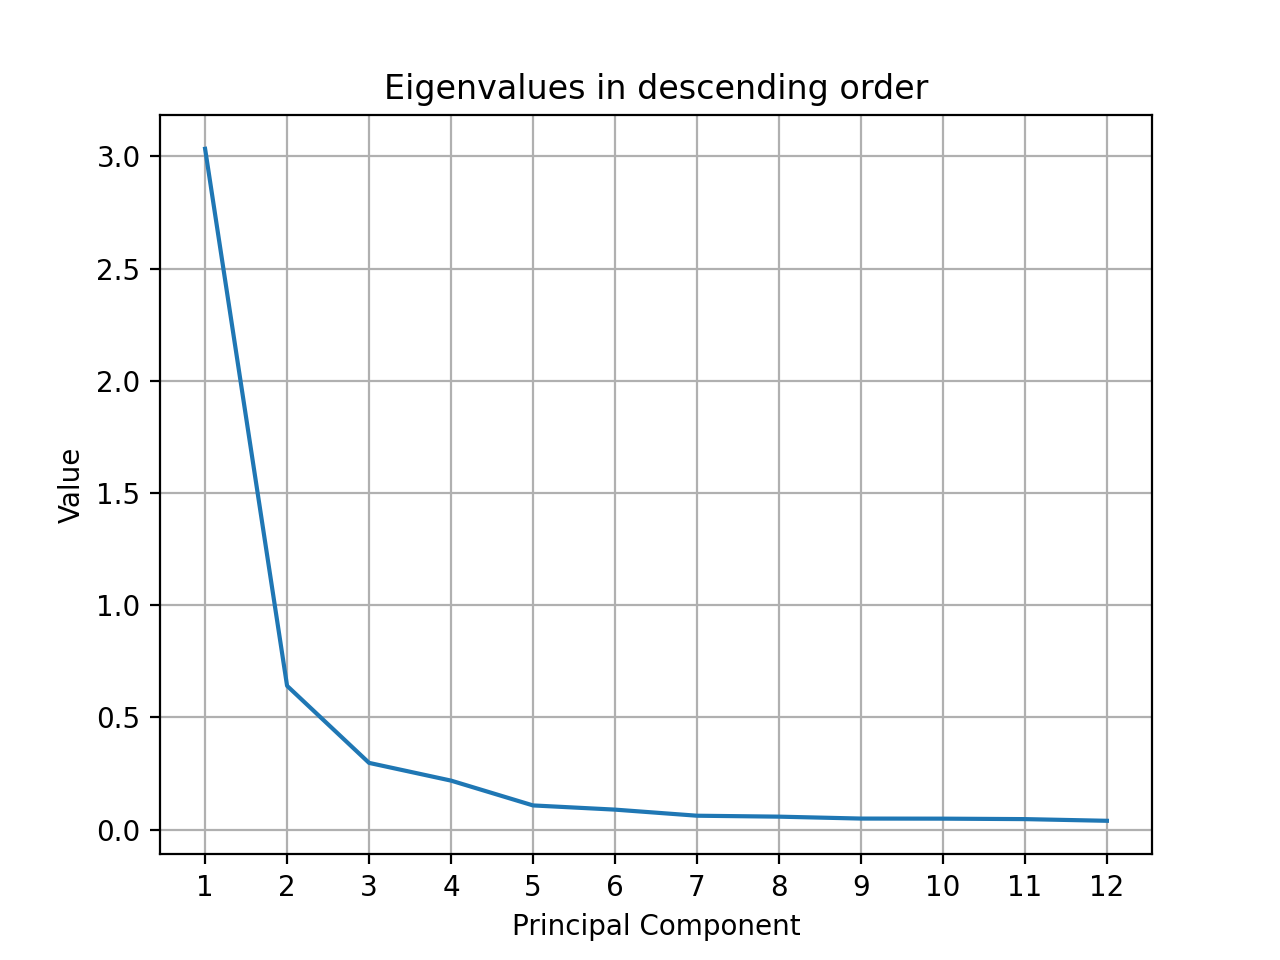

<IPython.core.display.Javascript object>


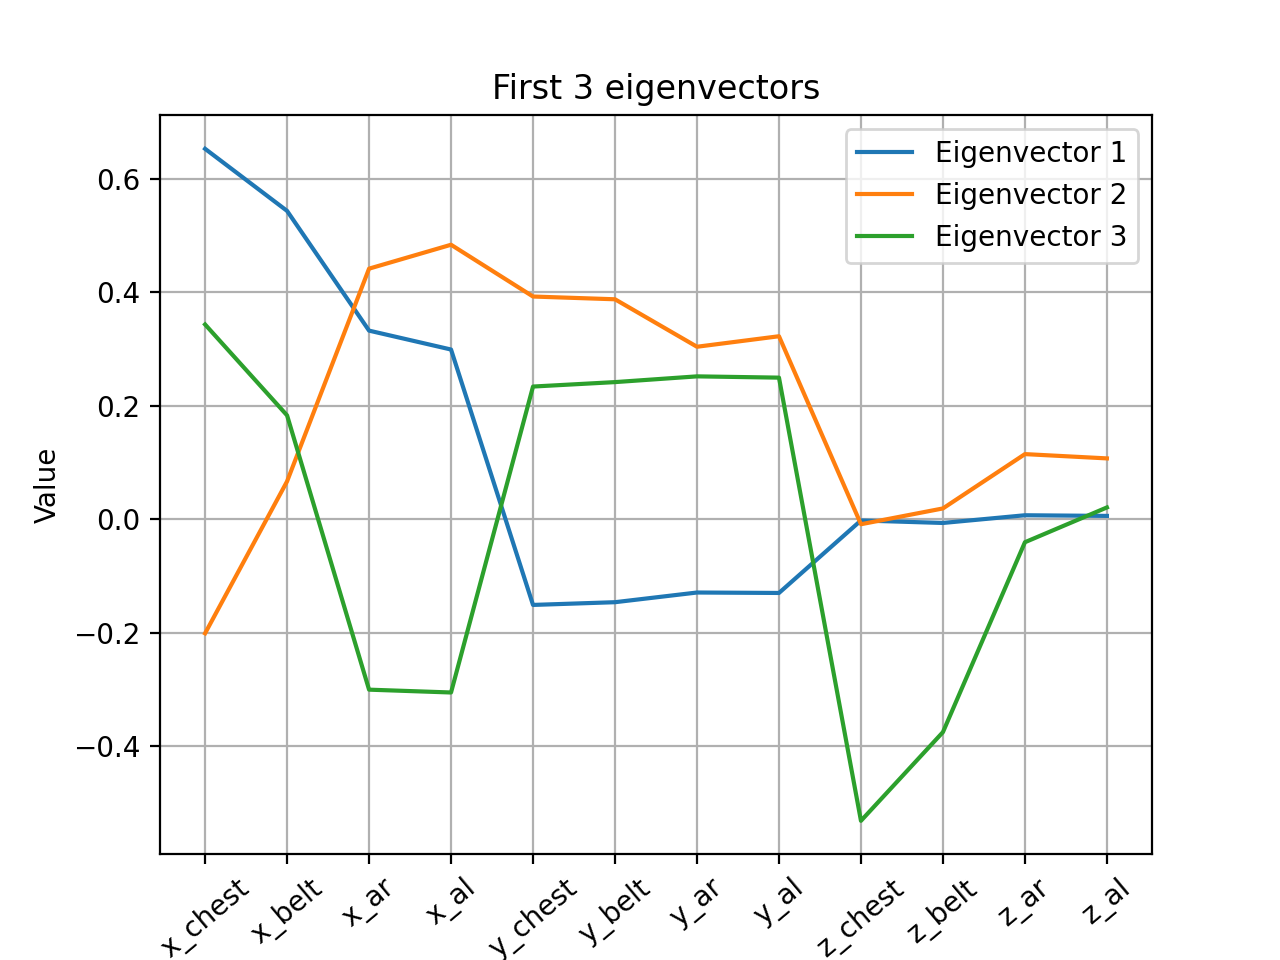

<IPython.core.display.Javascript object>


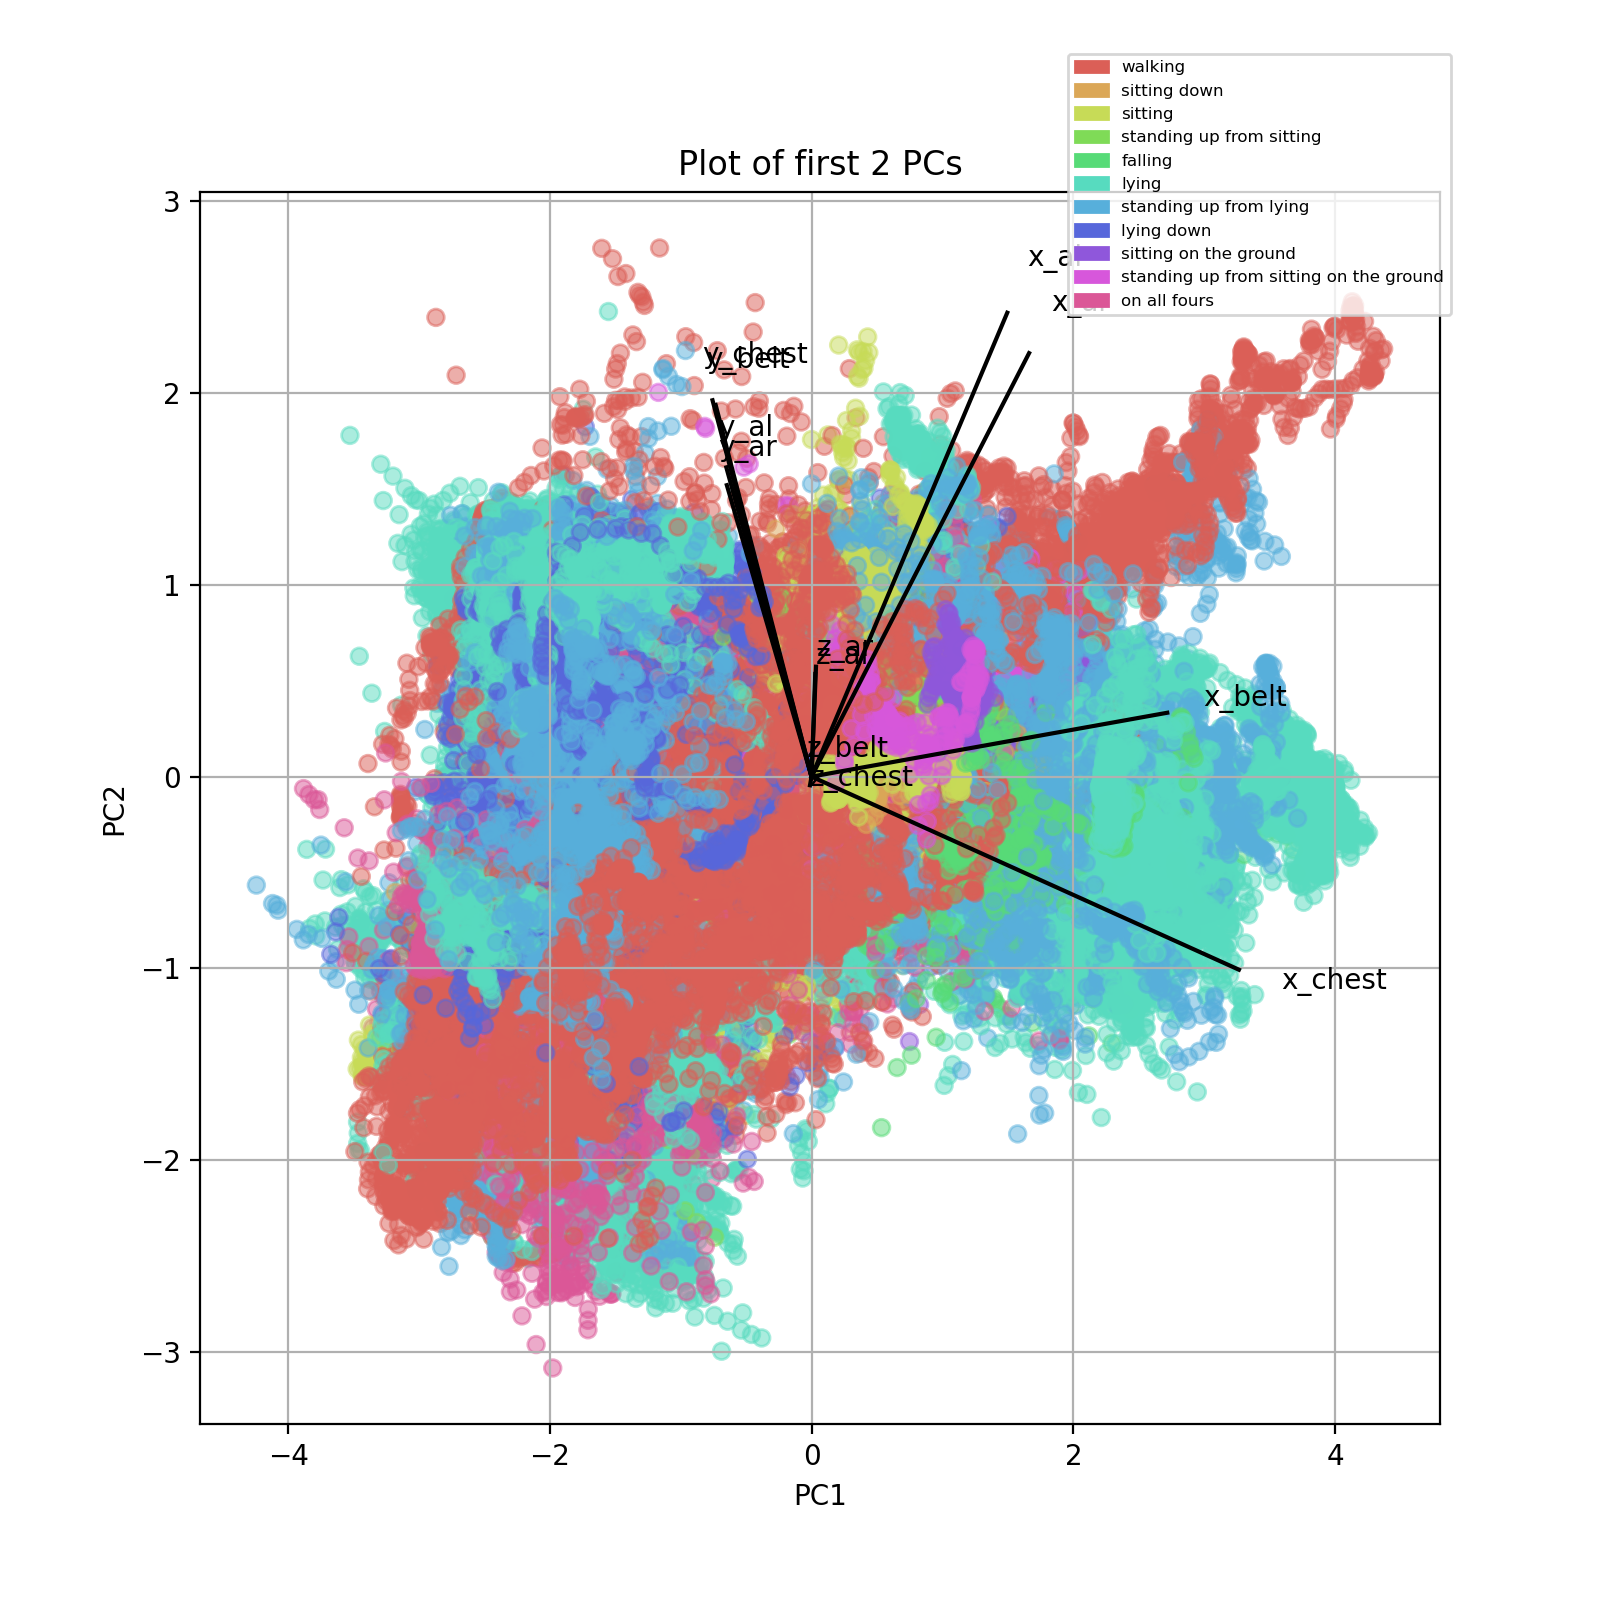

<IPython.core.display.Javascript object>


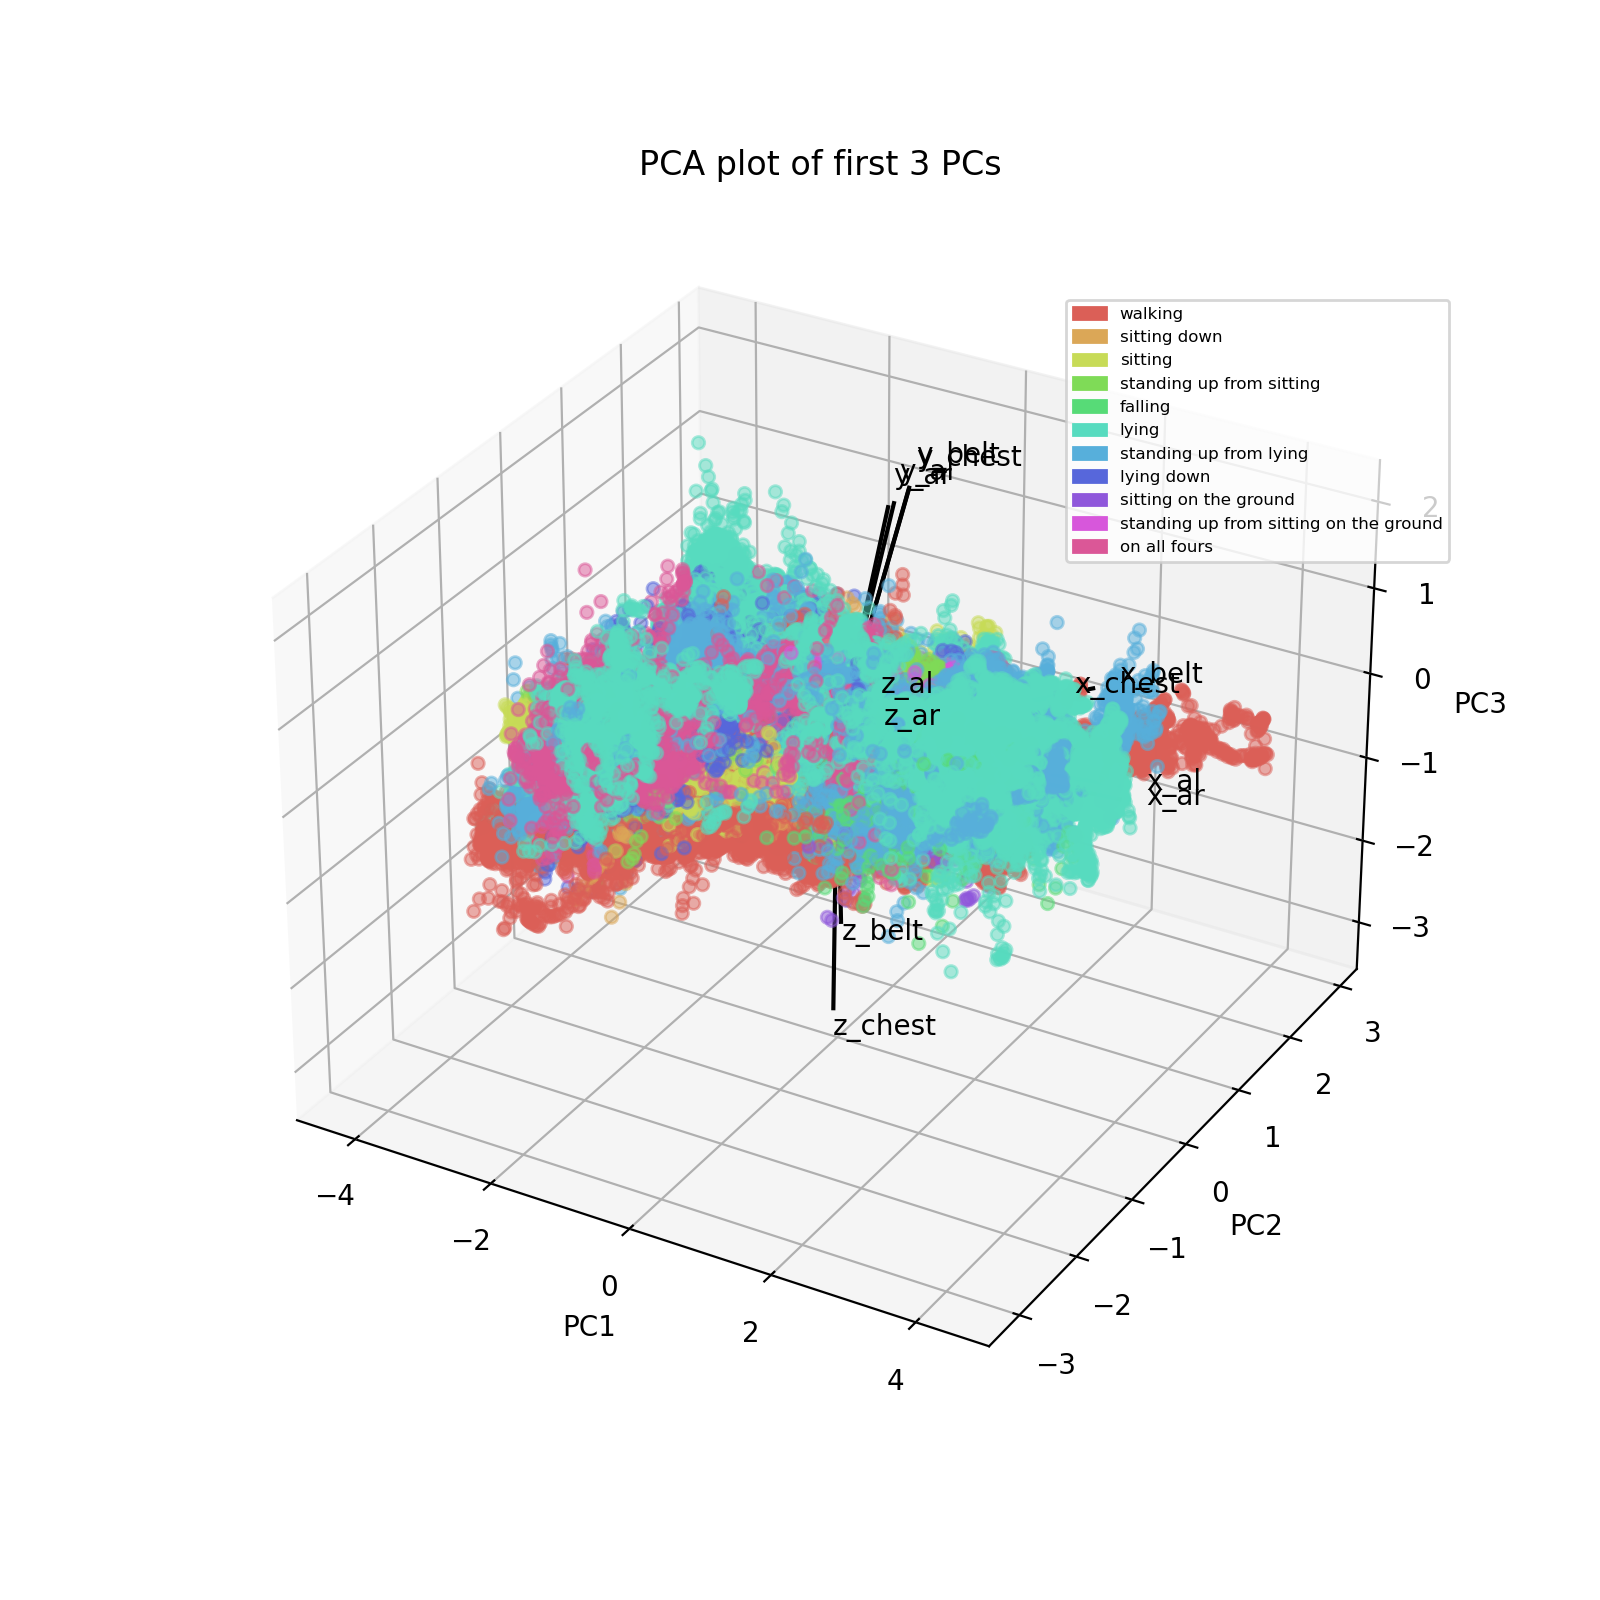

PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0       2.617548  1.325635 -0.292061  0.680158 -0.360807 -0.068636 -0.009446   
1       2.620493  1.326871 -0.295911  0.679722 -0.359731 -0.072200 -0.013829   
2       2.635749  1.323256 -0.288440  0.675768 -0.358873 -0.082738 -0.014051   
3       2.651102  1.324907 -0.257815  0.657417 -0.346032 -0.103184 -0.027107   
4       2.659644  1.296632 -0.224235  0.642492 -0.312385 -0.112920 -0.058796   
...          ...       ...       ...       ...       ...       ...       ...   
164855  0.672865  0.755559 -0.281320  0.913401 -0.239383 -0.022955  0.134332   
164856  0.696968  0.749089 -0.266641  0.888118 -0.225878 -0.022858  0.179684   
164857  0.697832  0.683410 -0.232985  0.883780 -0.201582 -0.013274  0.164869   
164858  0.681272  0.626271 -0.224052  0.898353 -0.175233  0.001656  0.143631   
164859  0.666409  0.589654 -0.211654  0.912011 -0.170075  0.006948  0.105277   

             PC8       PC9      PC10      PC11      PC12 sequence_name  \
0      -0.303259  0.092749  0.155405  0.166017  0.020364           A01   
1      -0.294037  0.090405  0.154613  0.159081  0.011981           A01   
2      -0.287706  0.092407  0.154994  0.145110  0.004269           A01   
3      -0.264113  0.095081  0.148327  0.165599 -0.009100           A01   
4      -0.267530  0.109955  0.169454  0.199995 -0.010339           A01   
...          ...       ...       ...       ...       ...           ...   
164855  0.032330  0.008454  0.159077  0.070942  0.196663           E05   
164856  0.054477  0.013768  0.136373  0.047812  0.196609           E05   
164857  0.039718  0.036380  0.121382  0.027594  0.205736           E05   
164858  0.027726  0.048252  0.102644  0.026673  0.212152           E05   
164859  0.005706  0.058612  0.105062  0.027266  0.217112           E05   

       activity  
0       walking  
1       walking  
2       walking  
3       walking  
4       walking  
...         ...  
164855  walking  
164856  walking  
164857  walking  
164858  walking  
164859  walking  

[164860 rows x 14 columns]

In [12]:


# *******************************  PCA ***********************************


def plot_eigenvalues(eig_val, seq):
    # Making a plot of eigenvalues to decide where the elbow point is to include most of the variance
    
    plt.figure(); plt.plot(eig_val); plt.ylabel('Value'); plt.xticks(ticks = range(12), labels=range(1,13)); plt.xlabel('Principal Component')
    plt.title("Eigenvalues in descending order"); plt.grid()
    plt.show()

    
    
def plot_eigenvectors(eig_vec, clean_df, seq, num_pcs):
    # Sorting and plotting selected number of eigenvectors corresponding to largest eigenvalues
    
    ax = plt.figure().add_subplot(111); 
    labels = []
    for i in range(num_pcs):
        
        # Sorting by x, y and z-value to get a better view of the coordinates variance
        x,y,z = eig_vec[:,i][0::3],eig_vec[:,i][1::3],eig_vec[:,i][2::3]
        eig = np.concatenate((x,y,z))
        ax.plot(eig)
        x,y,z = clean_df.keys()[0::3],clean_df.keys()[1::3],clean_df.keys()[2::3]
        xyz_str = np.concatenate((x,y,z))
        labels.append("Eigenvector " + str(i+1))
    plt.ylabel('Value'); plt.title('First '+str(num_pcs)+' eigenvectors'); plt.grid()
    plt.xticks(ticks = range(12), labels=xyz_str,rotation=40)
    plt.legend(labels=labels); plt.show()

    
    
def colors_for_classes(target):
    # Assigning colors to classes
    
    # Color palette based on the number of unique values in the target variable
    n_colors = len(target.unique())
    palette = sns.color_palette('hls', n_colors)

    # Dictionary that maps each value of the target variable to a color in the palette
    color_dict = dict(zip(target.unique(), palette))

    # Convert the categorical values to colors using the dictionary
    colors = target.map(color_dict)
    
    # Getting class patches to plot legend with class and corresponding color
    class_patches = [Patch(color=color_dict[class_], label=class_) for class_ in color_dict]
    
    return colors, class_patches



def plot_2PCS(pcs, eig_vec, seq_df, seq):
    # Plotting the first 2 principal components in 2D
    pc1, pc2 = pcs[:,0], pcs[:,1]
    
    # Assigning colors to activities
    target = seq_df["activity"]
    colors, class_patches = colors_for_classes(target)
    seq_df = seq_df.drop(columns=["activity", "sequence_name"])
    
    # Plotting the points from the PCs
    fig = plt.figure(figsize=(8, 8)); ax = fig.add_subplot(111)
    scatter = ax.scatter(pc1, pc2,alpha=0.5,cmap=plt.cm.brg, c=colors)

    # Plotting and scaling vectors from 0 to the point corresponding to each coordinate in the 2 principal directions
    for dim in range(pcs.shape[1]):  # 12 dimensions
          ax.plot((0,5*eig_vec[dim,0]),(0,5*eig_vec[dim,1]), 'black')
          ax.text(5*eig_vec[dim,0]*1.1,5*eig_vec[dim,1]*1.1,seq_df.keys()[dim]) 
    plt.xlabel('PC1'); plt.ylabel('PC2'); plt.title("Plot of first 2 PCs"); 
    plt.legend(handles=class_patches, fontsize=6, loc=(0.7,0.9)); ax.grid(); plt.show()

    
def plot_3PCS(pcs, eig_vec, seq_df, seq):
    # Plotting the first 3 principal components in 3D
    pc1, pc2, pc3 = pcs[:,0], pcs[:,1], pcs[:,2]
    
    # Assigning colors to activities
    target = seq_df["activity"]
    colors, class_patches = colors_for_classes(target)
    seq_df = seq_df.drop(columns=["activity", "sequence_name"])
    
    # Plotting the points from the PCs
    fig = plt.figure(figsize=(8, 8)); ax = fig.add_subplot(111, projection="3d")
    scatter = ax.scatter(pc1, pc2, pc3,alpha=0.5,cmap=plt.cm.brg, c=colors)
    
    # Plotting and scaling vectors from 0 to the point corresponding to each coordinate in the 2 principal directions
    for dim in range(pcs.shape[1]):
          ax.plot((0,6*eig_vec[dim,0]),(0,6*eig_vec[dim,1]), (0,6*eig_vec[dim,2]), 'black')
          ax.text(6*eig_vec[dim,0]*1.1,6*eig_vec[dim,1]*1.1, 6*eig_vec[dim,2]*1.1,seq_df.keys()[dim]) 
    ax.set_xlabel('PC1'); ax.set_ylabel('PC2'); ax.set_zlabel('PC3'); plt.title("PCA plot of first 3 PCs")
    plt.legend(handles=class_patches, fontsize=6, loc=(0.7,0.7)); ax.grid(); plt.show()

       
    
def calculations_pc(clean_df):
    # Mean vector (the mean of each coordinate column in a vector)
    mu_vector = np.mean(clean_df, axis = 0)
    
    # Center the data around the origin
    mu_centered_data = (clean_df - mu_vector)
    
    # Covariance matrix
    C = np.cov(mu_centered_data.T)
    
    # Getting the eigenvalues and eigenvectors from the covariance matrix
    eig_val_unsorted, eig_vec_unsorted = np.linalg.eig(C)
    
    # Sorting the eigenvalues and eigenvectors in descending order
    sorted_indices = np.argsort(eig_val_unsorted)[::-1]
    eig_val = eig_val_unsorted[sorted_indices]
    eig_vec = eig_vec_unsorted[:,sorted_indices]
    
    # Getting all PC:s by projecting the centered data onto the eigenvectors 
    pcs = np.dot(eig_vec.T, mu_centered_data.T).T
    
    return mu_centered_data, mu_vector, eig_vec, eig_val, pcs



def pca(seq, seq_df):
    
    # Creating a new dataframe without activity and sequence since we need to keep the orginial to plot target classes
    clean_df = seq_df.drop(columns=["activity", "sequence_name"])
    
    mu_centered_data, mu_vector, eig_vec, eig_val, pcs = calculations_pc(clean_df)
    
    
    # Selected number of pcs
    num_pcs = 3
    
    print("Cumulative variance in the first n eigenvectors:")
    # Calculating proportion of variance for the sum of PC:s
    for i in range(1,13):
        sum_variance = np.sum(eig_val[0:i])/np.sum(eig_val)
        print("n =",i, round(sum_variance,4))
    
    # Different plotting functions for visualization
    plot_eigenvalues(eig_val, seq)
    plot_eigenvectors(eig_vec, clean_df, seq, num_pcs)
    plot_2PCS(pcs, eig_vec, seq_df, seq)
    plot_3PCS(pcs, eig_vec, seq_df, seq)
    
    # Creating a new dataframe of the PC:s
    new_df = pd.DataFrame(pcs, columns=["PC"+str(i) for i in range(1,13)])
    seq_df = seq_df.set_index(new_df.index)
    new_df['sequence_name'] = seq_df['sequence_name']
    new_df['activity'] = seq_df['activity']
    display(new_df)

pca("all", grouped_df)

# PCA on just one sequence
#pca("A01", seq_dfs["A01"])
#pca("C05", seq_dfs["C05"])
#pca("C03", seq_dfs["C03"])